# Fields

In [1]:
import pandas as pd
import geopandas as gp
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
field_data = pd.read_csv("field_data.csv")
area_Data = pd.read_csv("CensusTract.csv")
field_data.head()

,id,name,has_lights,park,field_usage,goal_post,infield_type,left_field_distance,center_field_distance,right_field_distance,...,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1914615260,Arlington Field 1,t,Arlington Park,Diamond Only,0,Skinned,160.0,230.0,290.0,...,South Side Slopes,3,16,42003160800,3,16,3,4-22,40.418314,-79.975007
1,1151740179,Armstrong,f,Armstrong Park,Diamond and Rectangular,0,Skinned,240.0,163.0,122.0,...,South Side Flats,3,17,42003170200,3,17,3,4-24,40.428074,-79.985662
2,971009139,Bandbox,f,Arsenal Park,Diamond Only,0,Skinned,135.0,200.0,150.0,...,Lower Lawrenceville,7,6,42003060300,2,6,2,3-3,40.466331,-79.961299
3,1581124728,Banksville,f,Banksville Park,Diamond Only,0,Skinned,304.0,354.0,373.0,...,Banksville,2,20,42003202300,5,20,6,4-9,40.413923,-80.039940
4,1052125703,Banksville School,t,Banksville School Park,Diamond Only,0,Skinned,180.0,175.0,185.0,...,Banksville,2,20,42003202300,5,20,6,4-9,40.407059,-80.037870


In [4]:
#Fields per neighborhood list in order
fields_per_hood = field_data['neighborhood'].value_counts()
print(fields_per_hood)

Brighton Heights            7
South Side Slopes           6
Brookline                   6
Squirrel Hill South         5
Carrick                     5
Lower Lawrenceville         4
Mount Washington            4
Hazelwood                   4
Highland Park               4
Sheraden                    3
Shadyside                   3
Troy Hill                   3
Morningside                 3
Beechview                   3
Beltzhoover                 3
Central Lawrenceville       2
Bedford Dwellings           2
Allegheny Center            2
Greenfield                  2
Manchester                  2
Perry North                 2
Spring Hill-City View       2
Westwood                    2
South Side Flats            2
Elliott                     2
South Oakland               2
Regent Square               2
Banksville                  2
Crafton Heights             2
Lincoln-Lemington-Belmar    2
Windgap                     1
Squirrel Hill North         1
Polish Hill                 1
West End  

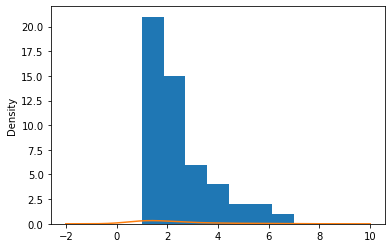

In [5]:
#A histogram and density graph of fields per neighborhood
fields_per_hood.hist(bins=7)
fields_per_hood.plot.density()

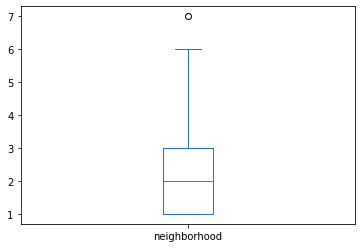

In [6]:
# Boxplot for distribution and outliers
fields_per_hood.plot.box()

### Baseball/Softball Diamonds

Text(0.5, 0, 'Right Field Distance')

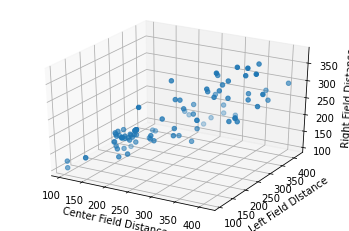

In [7]:
#Scatter plot of field sizes
threed = plt.figure().gca(projection='3d')
threed.scatter(field_data['center_field_distance'], field_data['left_field_distance'], field_data['right_field_distance'])
threed.set_xlabel('Center Field Distance')
threed.set_ylabel('Left Field DIstance')
threed.set_zlabel('Right Field Distance')

Most fields are not full size and are for younger players. But the largest cluster is for boys under the age of 14, because by 14 you reach full or 60/90th (which is also the normal softball field size) size fields. The variation in the larger sizes is standard even in professional fields and are all equally playable.

### Rectangular Fields
With the only auxillary data on rectanugular fields being goal posts and lights, they will com into consideration later.

### Raw Field Amount
Some fields are soley diamond, rectangular, or a hybrid of the two. Below I analize the field baised 

In [8]:
# adding a field count column
field_data['field_count'] = 1
# filter field data into a new variable
num_fields = field_data.groupby("neighborhood").sum()['field_count']

In [9]:
#read in the shapefile
neighborhoods = gp.read_file("Neighborhoods/Neighborhoods_.shp")
# merge data to shape map
fields_map = neighborhoods.merge(num_fields,how='left', left_on='hood', right_on='neighborhood')

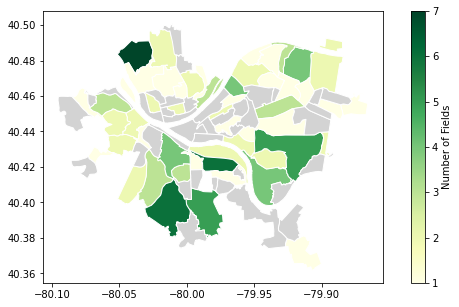

In [10]:
# Color map baised on number of fields
fields_map.plot(column='field_count',
                cmap='YlGn',
                edgecolor="white",
                legend=True,
                legend_kwds={'label': "Number of Fields"},
                figsize=(10,5),
                missing_kwds={"color": "lightgrey"}
               )

### Focusing In
So far I have looked at the data based off of the number of fields in a colormap (diamond, rectangular, and hybrid). As well as the sizes of diamonds.Here I will take the top choices baised on amount into the next stage.

The remaining canidates being, Brighton Heights, South Side Slopes, Brookline, Squirrel Hill South, Carrick, Lower Lawrenceville, Mount Washington, Hazelwood, and Highland Park. From these nine I will decide on a top three.

### Coming to a Conclusion

Selection factors include, number of fields, diversity in field type, and field quality (goal poasts and lights). Each neighborhood get 1/2 of a point for a field, 2 extra points for field diversity, and 1/4 of a point for goal posts (football) and lights. By narrowing things down I wasable to more carfully construct my socing system and conclusions with carful analysis.

## 1st Brookline

2 hybrid fields \
1 rectangular field \
3 diamond fields \
4 goal posts \
4 lighted fields \
Total Score of: 7 

## 2nd South Side Slopes

5 diamond fields \
1 rectangular field \
4 lighted fields \
1 goal post \
Total score of: 6.25

## 3rd Carrick

4 diomond fields \
1 rectangular field\
2 goal posts \
3 lighted fields \
Total score of: 5.75

### Remaining Scores

Mout Washington: 5 \
Lower Lawrance: 4.75 \
Hazelwood: 4.5 \
Highland Park: 4 \
Brighton Heights:3.5 

#### Quantity does not equal quality